In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    df.fillna(df.mean().round(1), inplace=True)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def normalize(X):
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    return X_new, mean, std

# Analysis of data

In [4]:

df = pd.read_csv("Concrete_Data_Yeh.csv", delimiter=',')
cols = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate','fineaggregate','age','csMPa']
print(df)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   28  61.89  
2             594.0  

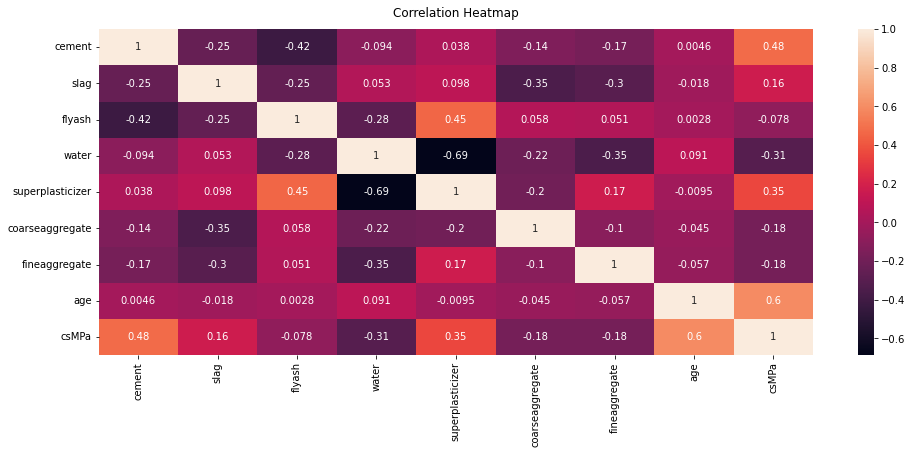

In [5]:
X = df[cols]
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
# sns.pairplot(df[cols])
# plt.tight_layout()
# plt.show()

# Feature selection and augmentation

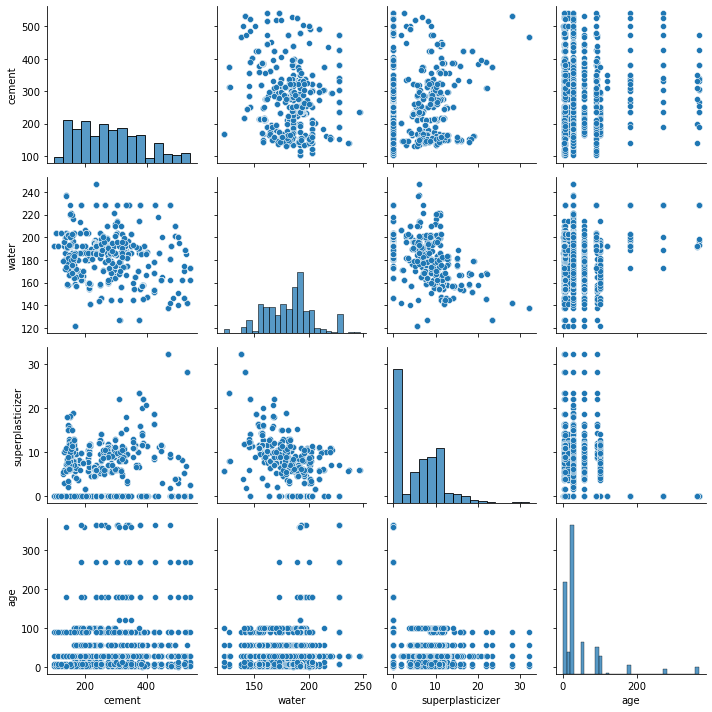

In [7]:
data_columns = ["cement","water", "superplasticizer","age"]
target_column = "csMPa"
sns.pairplot(df[data_columns])
plt.tight_layout()
plt.show()

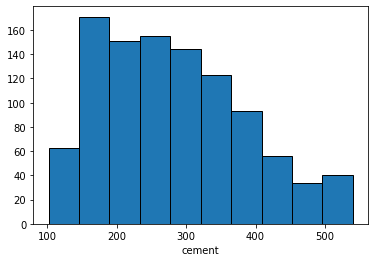

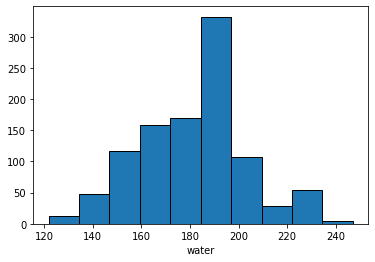

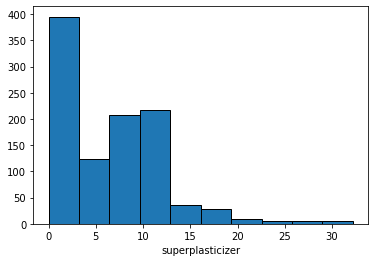

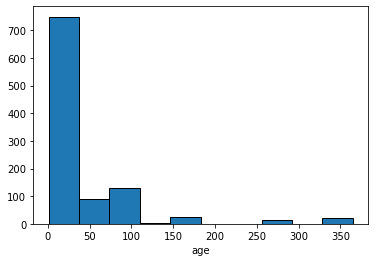

In [8]:
for i in data_columns:
    fig,ax = plt.subplots(1,1)
    ax.hist(df[i], edgecolor = "black")
    plt.xlabel(i)
    plt.show()

In [9]:
X , y = load_datasets("Concrete_Data_Yeh.csv",data_columns,target_column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Training set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(824, 4), y=(824,)
Training set: X=(206, 4), y=(206,)


# Custom linear regressor

In [10]:
def normalize(X):
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    return X_new, mean, std

def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

def h(X, theta):
    h = np.dot(X,theta)
    return h

def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    J = sum((h(X, theta) - y) ** 2)/(2*m)
    return J

def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = (np.dot((h(X,theta) - y),X) / m)
    return d_theta

def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha * derivative_theta(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)
        if print_J == True:
            print(J)
        if abs(J-J_history[-2]) < epsilon or i>num_iters:
            break
    return theta, J_history

def predict(X, mean, std, theta):
    predictions = h(prepare_X((X-mean)/std),theta)
    return predictions

In [11]:
X_train_normaziled, mean, std = normalize(X_train)
print('mean shape:{} ', mean.shape)
for i in mean:
    print(i)
print('std: ', std.shape)
for i in std:
    print(i)
X_prep = prepare_X(X_train_normaziled)
y_prep = y_train[:]
theta = [0,0,0,0,0]

mean shape:{}  (4,)
281.7035194174757
181.75121359223292
6.182402912621352
46.37621359223301
std:  (4,)
104.23641916891995
21.57497984963229
6.022254681482898
65.88759688893487


In [12]:
cost_function(X_prep, y_prep, theta)

770.3735479368931

In [13]:
alpha = 0.01
epsilon = 0.000001
num_iters = 2000
new_theta, Js = gradient_descent(X_prep, y_prep, theta, alpha, epsilon, num_iters, print_J=False)
print(new_theta)
print(len(Js))

[35.62970596  6.99988843 -2.78792868  4.82569255  6.44543895]
1003


In [14]:
cost_function(X_prep, y_prep, new_theta)

69.20545359260288

# Results evaluation for custom regressor

In [15]:
test_data = X_test.iloc[:20]
test_actual = y_test.iloc[:20]
test_data_prep = prepare_X(test_data)

for Actual, Predicted in zip(test_actual.values, predict(test_data, mean, std, new_theta)):
    print(np.array_str(np.c_[Actual,round(Predicted,2)]).replace('[',' ').replace(']',' '))

  37.36 29.48  
  37.92 41.52  
  52.12 41.82  
  82.6  64.57  
  44.33 43.71  
  26.06 32.54  
  61.24 39.96  
  24.45 26.16  
  15.07 19.7   
  24.34 19.94  
  34.4  42.23  
   7.75 31.11  
  24.9  28.96  
  52.45 39.2   
  11.41 19.62  
  14.2  26.21  
  52.83 37.57  
  31.45 30.86  
  39.06 39.37  
  37.68 35.09  


In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predict(X_test, mean, std, new_theta)))
print('MSE:', metrics.mean_squared_error(y_test, predict(X_test, mean, std, new_theta)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict(X_test, mean, std, new_theta))))

MAE: 9.700036865449768
MSE: 146.6951774903733
RMSE: 12.111778461083794


# Sklearn regressor

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [18]:
test_data = X_test.iloc[:20]
test_actual = y_test.iloc[:20]

for Actual, Predicted in zip(test_actual.values,regr.predict(test_data)):
    print(np.array_str(np.c_[Actual,round(Predicted,2)]).replace('[',' ').replace(']',' '))

  37.36 29.49  
  37.92 41.53  
  52.12 41.84  
  82.6  64.59  
  44.33 43.75  
  26.06 32.53  
  61.24 39.96  
  24.45 26.16  
  15.07 19.71  
  24.34 19.98  
  34.4  42.23  
   7.75 31.06  
  24.9  28.96  
  52.45 39.21  
  11.41 19.61  
  14.2  26.19  
  52.83 37.58  
  31.45 30.85  
  39.06 39.38  
  37.68 35.06  


In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, regr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, regr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regr.predict(X_test))))

MAE: 9.700138117761961
MSE: 146.70274050987092
RMSE: 12.112090674605723
